<a href="https://colab.research.google.com/github/nafi-rahman/ML-AI/blob/Tutorials/MLforEveryone%7CRegression%7C(Bike_DATASET).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning for Everybody – Full Course by Kylie Ying  


https://youtu.be/i_LwzRVP7bg?list=PLWKjhJtqVAblStefaz_YOVpDWqcRScc2s

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Source: Data Source :http://data.seoul.go.kr/
SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [4]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

In [5]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

In [6]:
df.head()


,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


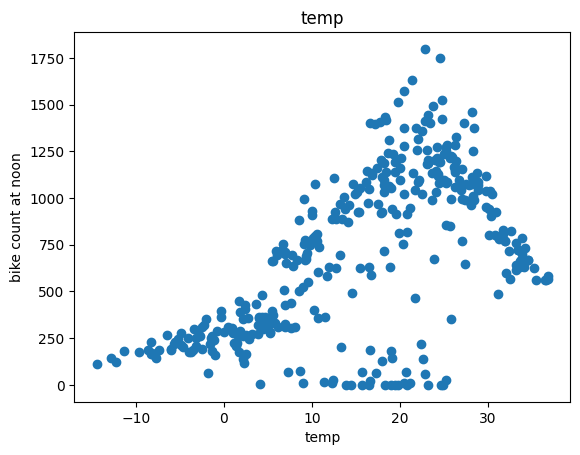

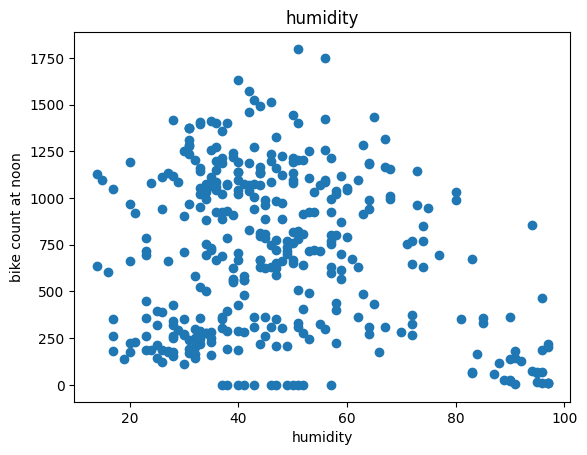

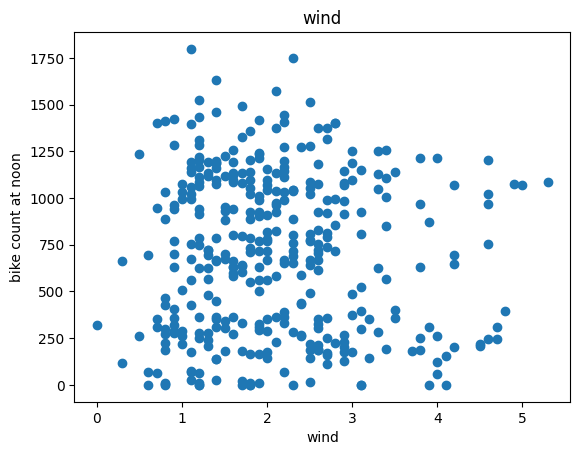

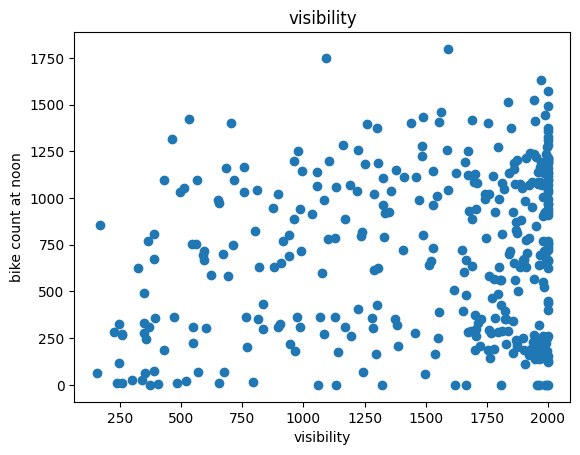

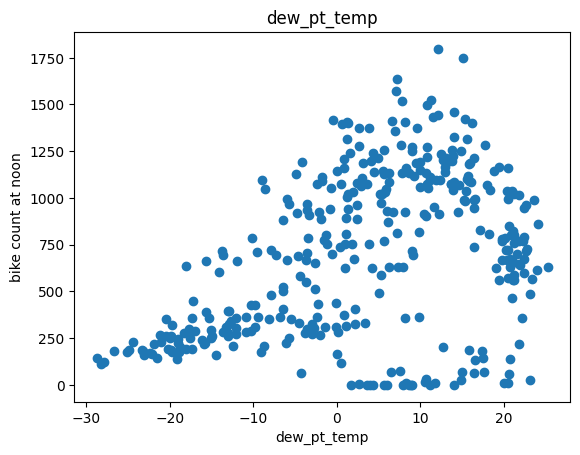

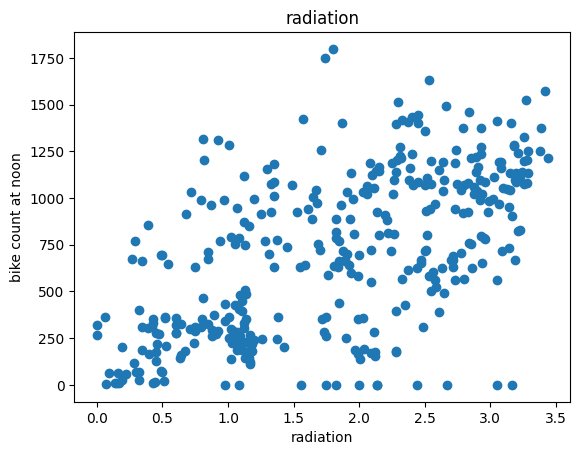

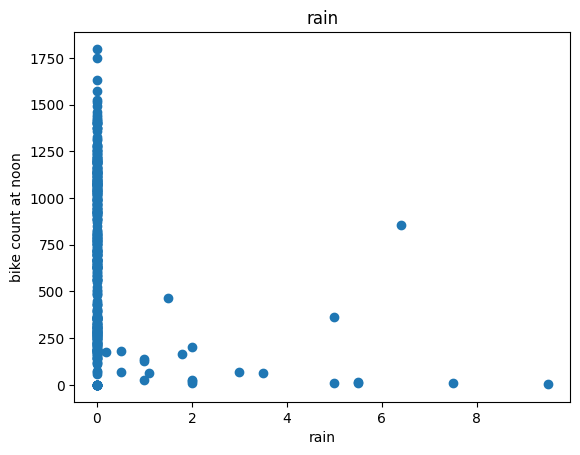

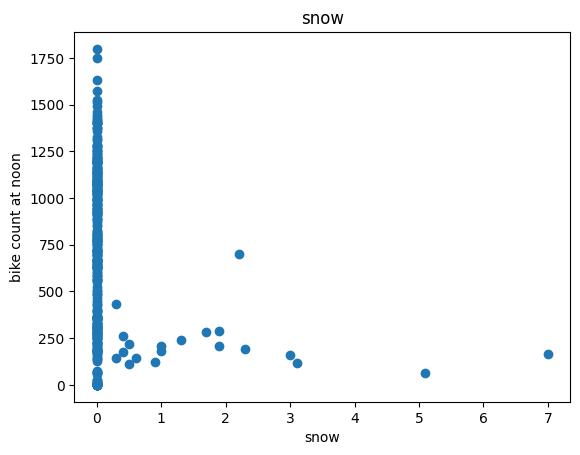

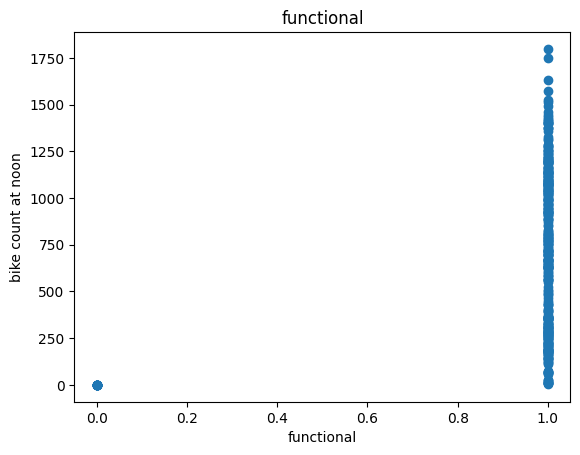

In [7]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("bike count at noon")
  plt.xlabel(label)
  plt.show()

In [8]:
df = df.drop(["wind", "visibility", "functional"], axis =1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


#Train/Test/Validation

In [9]:
train, val,test = np.split(df.sample(frac=1), [int(0.6*len(df)),  int(0.8*len(df))])

In [10]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    x = dataframe[[c for c in dataframe.colums if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      x = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      x = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((x,y))

  return data, x,y


In [11]:
_, x_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, x_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, x_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [12]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [13]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.15515025]] [363.50225677]


In [14]:
temp_reg.score(x_test_temp, y_test_temp)

0.2996084674570929

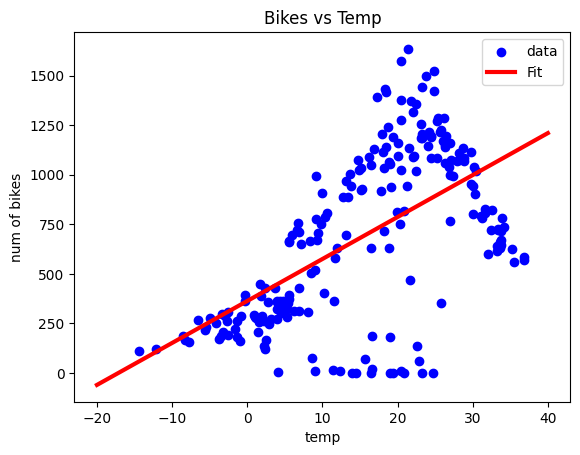

In [15]:
plt.scatter(x_train_temp, y_train_temp, label="data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("num of bikes")
plt.xlabel("temp")
plt.show()

#Multiple Linear Regression

In [16]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [17]:
train, val,test = np.split(df.sample(frac=1), [int(0.6*len(df)),  int(0.8*len(df))])
_, x_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, x_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [18]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [19]:
all_reg.score(x_test_all, y_test_all)

0.5506165319741327

#Regression with Neural Net

In [20]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [21]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [22]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error' )

In [23]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1),
    y_train_temp,
    verbose=0,
    epochs=100,
    validation_data=(x_val_temp, y_val_temp)
)


4/4 [==============================] - 0s 3ms/step


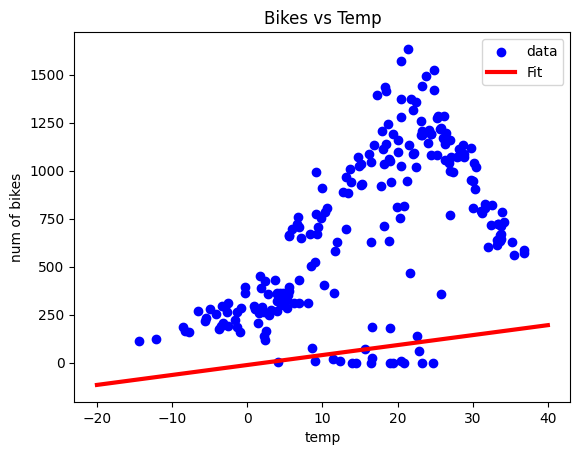

In [24]:
plt.scatter(x_train_temp, y_train_temp, label="data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("num of bikes")
plt.xlabel("temp")
plt.show()

#NN

In [25]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),

])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error' )

In [26]:
history = nn_model.fit(
    x_train_temp,y_train_temp,
    validation_data=(x_val_temp, y_val_temp),
    epochs=100
)


Epoch 1/100
7/7 [==============================] - 1s 39ms/step - loss: 658551.6250 - val_loss: 646594.4375
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 654359.8750 - val_loss: 638482.8125
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 639210.8750 - val_loss: 612972.0000
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 598525.8125 - val_loss: 547527.1875
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 498462.0625 - val_loss: 416418.0938
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 330129.2500 - val_loss: 243226.3281
Epoch 7/100
7/7 [==============================] - 0s 33ms/step - loss: 182686.6719 - val_loss: 188057.5000
Epoch 8/100
7/7 [==============================] - 0s 57ms/step - loss: 178325.6562 - val_loss: 175322.2656
Epoch 9/100
7/7 [==============================] - 0s 25ms/step - loss: 139576.9844 - val_loss: 155342.7188
Epoch 10/100
7/7 [==========

KeyError: ignored

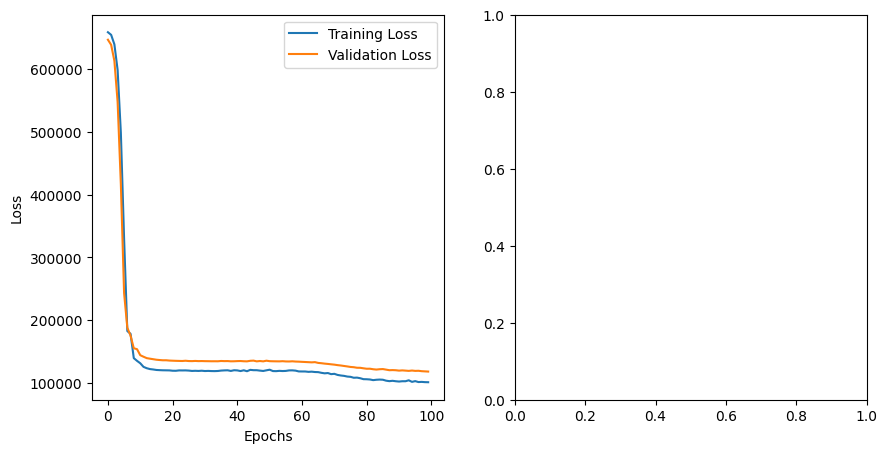

In [27]:

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


4/4 [==============================] - 0s 3ms/step


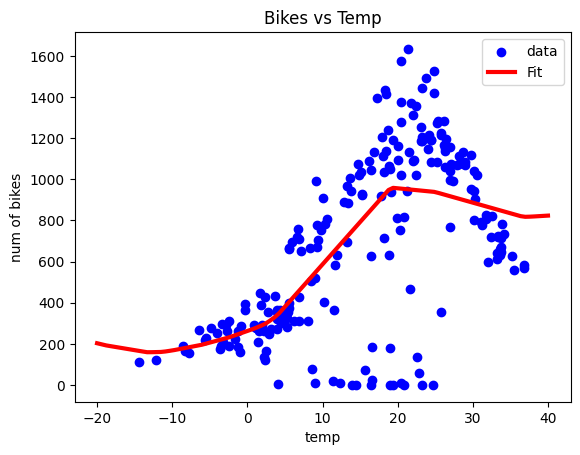

In [28]:
plt.scatter(x_train_temp, y_train_temp, label="data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("num of bikes")
plt.xlabel("temp")
plt.show()

In [32]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(x_train_all)



In [33]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),

])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error' )

In [34]:
history = nn_model.fit(
    x_train_all,y_train_all,
    validation_data=(x_val_temp, y_val_temp),
    epochs=100
)


Epoch 1/100
7/7 [==============================] - 3s 53ms/step - loss: 647726.1875 - val_loss: 484453.8125
Epoch 2/100
7/7 [==============================] - 0s 34ms/step - loss: 623575.2500 - val_loss: 232521.4844
Epoch 3/100
7/7 [==============================] - 0s 25ms/step - loss: 527496.8125 - val_loss: 295501.4062
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 330518.6250 - val_loss: 1555276.7500
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 166047.9062 - val_loss: 3617798.0000
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 182374.2500 - val_loss: 2648549.0000
Epoch 7/100
7/7 [==============================] - 0s 35ms/step - loss: 137656.8438 - val_loss: 2352907.5000
Epoch 8/100
7/7 [==============================] - 0s 17ms/step - loss: 137593.4844 - val_loss: 3950225.0000
Epoch 9/100
7/7 [==============================] - 0s 23ms/step - loss: 118130.8828 - val_loss: 5163420.0000
Epoch 10/100
7/7 [====

KeyError: ignored

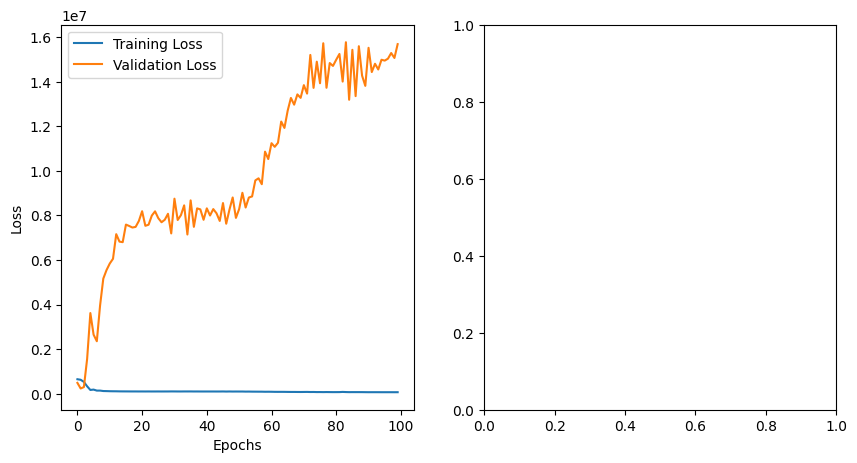

In [35]:

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [36]:
y_pred_LR = all_reg.predict(x_test_all)
y_pred_nn = nn_model.predict(x_test_all)

3/3 [==============================] - 0s 7ms/step


In [37]:
def MSE(y_pred,y_real):
  return (np.square(y_pred-y_real)).mean()

In [38]:
MSE(y_pred_LR,y_test_all)

85302.27617966352

In [39]:
MSE(y_pred_nn, y_test_all)

65384.616378581

In [ ]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="lin reg pred" )
plt.xlabel("true vals")
plt.ylabel("predictions")
plt.xlim(lims)
plt.ylim(lims)
